In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("lithium-ion-batteries.csv")

In [3]:
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


C:\Users\emund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Crystal System', ylabel='count'>

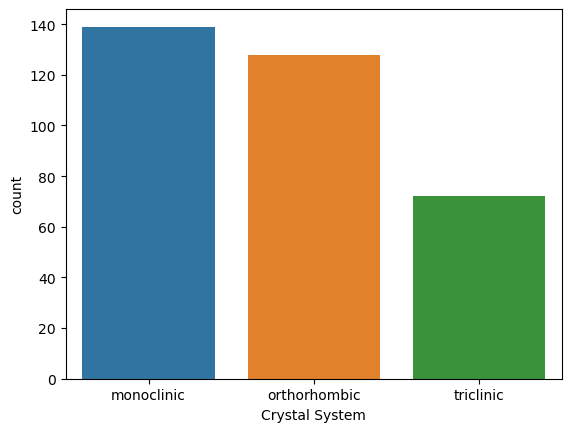

In [4]:
sns.countplot(df["Crystal System"])

C:\Users\emund\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spacegroup', ylabel='count'>

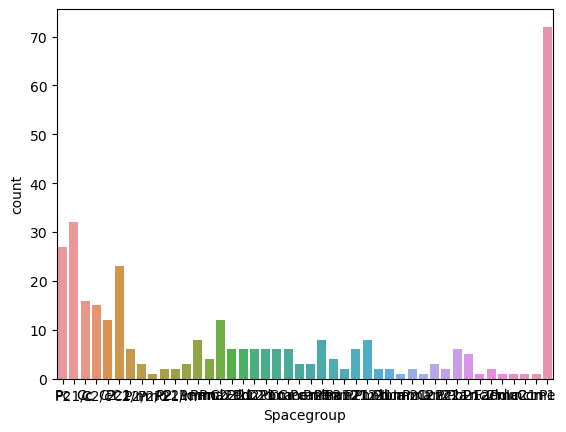

In [5]:
sns.countplot(df["Spacegroup"])

PART 1 QUESTION 2

The crystal systems are roughly balanced, although there are less triclinic samples than monoclinic and orthorhombic. The space groups are imbalanced, with a large count of one space group. 

In [6]:
df = df.drop(["Materials Id"], axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["Formula"] = encoder.fit_transform(df["Formula"])
df["Spacegroup"] = encoder.fit_transform(df["Spacegroup"])
df["Crystal System"] = encoder.fit_transform(df["Crystal System"])

df.head()

,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,54,31,-2.699,0.006,3.462,16,2.993,178.513,True,0
1,54,21,-2.696,0.008,2.879,32,2.926,365.272,True,0
2,81,6,-2.775,0.012,3.653,28,2.761,301.775,True,0
3,79,1,-2.783,0.013,3.015,38,2.908,436.183,True,0
4,48,1,-2.747,0.016,2.578,36,3.334,421.286,True,0


In [8]:
df.groupby(df["Formula"]).max()

,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
Formula,,,,,,,,,
0,2,-2.444,0.048,1.941,46,2.409,474.870,True,0
1,2,-2.476,0.055,1.715,46,2.399,472.581,True,0
2,2,-2.496,0.052,0.988,46,2.400,471.249,True,0
3,16,-2.194,0.028,0.311,63,4.093,595.723,False,2
4,16,-2.132,0.106,2.139,37,2.668,384.899,True,2
...,...,...,...,...,...,...,...,...,...
109,40,-2.527,0.095,3.042,112,3.898,1444.706,True,2
110,28,-2.780,0.080,1.497,80,3.343,860.040,True,2
111,6,-2.653,0.085,0.716,24,3.281,288.498,True,0


PART 1 QUESTION 3

LabelEncoder is more appropriate instead of OneHotEncoder because there are over one hundred different chemical formulas, so creating a new column for each categorical value would significantly increase the dimensions of the dataframe and slow down training.

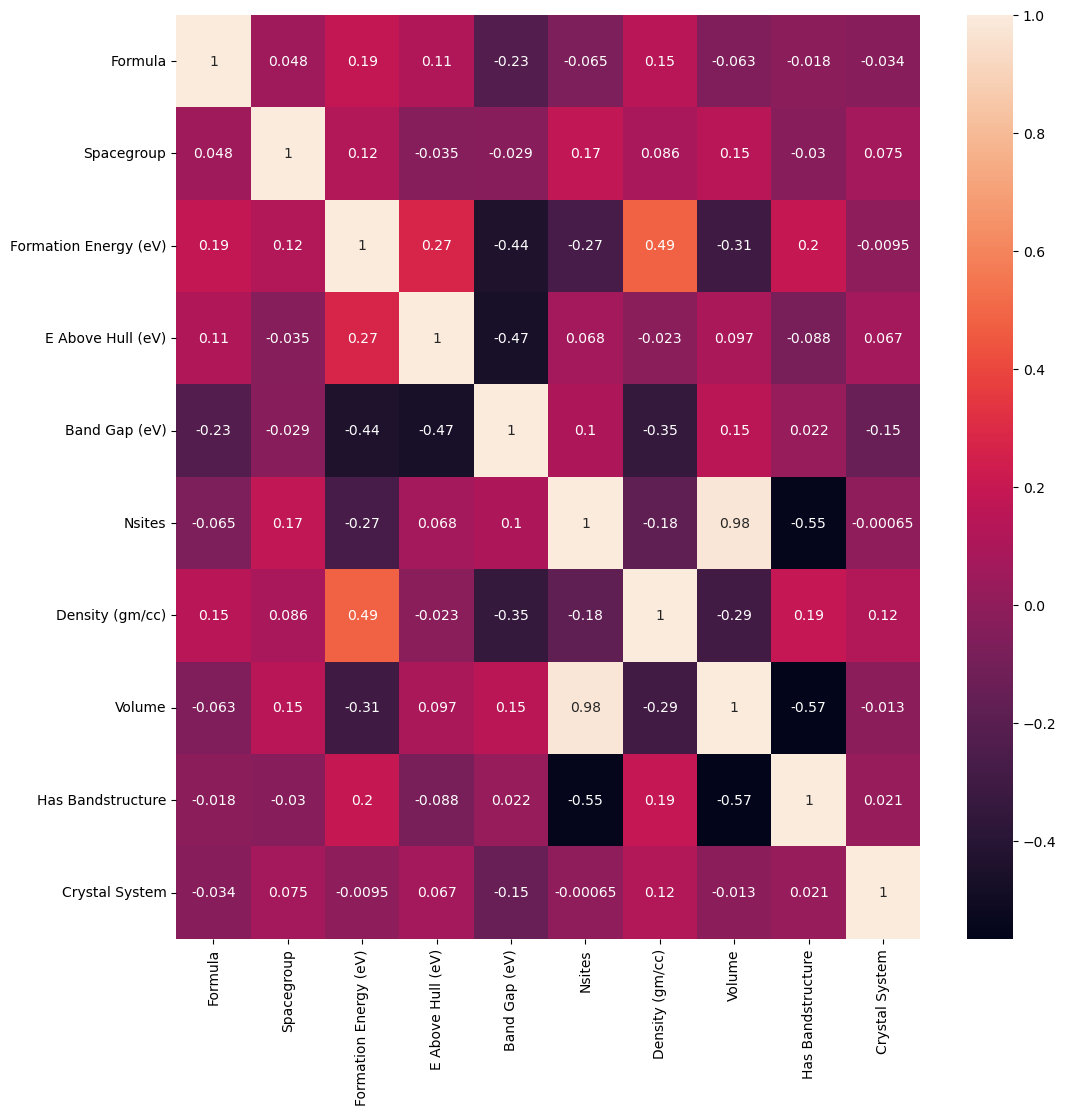

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

PART 1 QUESTION 4

None of the input features have a strong correlation with the crystal system nor spacegroup. Among those features, band gap and density have the strongest correlation with crystal system and volume, formation energy, and Nsites have the strongest correlation with spacegroup. However, among the input features, volume and Nsites are strongly positive correlated, Nsites and volume are negatively correlated with whether the chemical has bandstructure, and density and formation energy are positively correlated.

In [10]:
x = df.drop(["Spacegroup","Crystal System"], axis=1)
yspc = df["Spacegroup"]
ycry = df["Crystal System"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

x_train,x_test,y_train_cry,y_test_cry = train_test_split(x,ycry,test_size = 0.2)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train_scaled, y_train_cry)

y_pred_rf_cry = rf.predict(x_test_scaled)

print(rf.score(x_train_scaled,y_train_cry))
print(metrics.accuracy_score(y_test_cry,y_pred_rf_cry))

print(metrics.confusion_matrix(y_pred_rf_cry,y_test_cry))
print(metrics.classification_report(y_pred_rf_cry,y_test_cry))

1.0
0.5441176470588235
[[16 14  6]
 [ 3 13  2]
 [ 4  2  8]]
              precision    recall  f1-score   support

           0       0.70      0.44      0.54        36
           1       0.45      0.72      0.55        18
           2       0.50      0.57      0.53        14

    accuracy                           0.54        68
   macro avg       0.55      0.58      0.54        68
weighted avg       0.59      0.54      0.54        68



PART 2 QUESTION 2A

The random forest classifier has a score of 1.0 on the training data and 0.63 on the test data, suggesting the model may be overfit. The model correctly classified all triclinic crystals but misclassified some orthorhombic and monoclinic crystals as the other two varieties, respectively. 

In [11]:
x = df.drop(["Spacegroup","Crystal System"], axis=1)
yspc = df["Spacegroup"]
ycry = df["Crystal System"]

x_train,x_test,y_train_spc,y_test_spc = train_test_split(x,yspc,test_size = 0.2)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train_scaled, y_train_spc)

y_pred_rf_spc = rf.predict(x_test_scaled)

print(rf.score(x_train_scaled,y_train_spc))
print(metrics.accuracy_score(y_test_spc,y_pred_rf_spc))

print(metrics.confusion_matrix(y_pred_rf_spc,y_test_spc))
print(metrics.classification_report(y_pred_rf_spc,y_test_spc))

1.0
0.36764705882352944
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  0  0  0  0  1  0  0  0 17  2  1  2  0  0  0  0  0  0  0  0  0  0
   1  2  0]
 [ 0  0  0  0  0  0  0  0  0  

C:\Users\emund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emund\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\emund\anaconda3\lib\site-packages\sklearn\metrics\_cla

PART 2 QUESTION 2B

The random forest classifier has a score of 1.0 on the training data and an accuracy score of 0.40 on the test data. This is a very poor performance and likley due to the large number of categories (spacegroups) with few data points for each group to train on. Accordingly, the model performed better on the crystal system because it has fewer categories with more, balanced data.

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
x_train.shape[0]

271

In [14]:
model = Sequential()

model.add(Dense(1024,activation="relu",input_dim=8))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(3,activation="softmax"))

model.build()

x_train = np.asarray(x_train).astype('float32')

model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = "accuracy")
results = model.fit(x_train,y_train_cry,epochs = 300,validation_split=.2)

Epoch 1/300


C:\Users\emund\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 [==============================] - 1s 31ms/step - loss: 15.0981 - accuracy: 0.3611 - val_loss: 9.9462 - val_accuracy: 0.4727
Epoch 2/300
7/7 [==============================] - 0s 10ms/step - loss: 11.3571 - accuracy: 0.3056 - val_loss: 6.6023 - val_accuracy: 0.4727
Epoch 3/300
7/7 [==============================] - 0s 10ms/step - loss: 5.6136 - accuracy: 0.3519 - val_loss: 4.1109 - val_accuracy: 0.3636
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 3.0632 - accuracy: 0.3611 - val_loss: 2.7670 - val_accuracy: 0.3636
Epoch 5/300
7/7 [==============================] - 0s 11ms/step - loss: 2.2474 - accuracy: 0.4491 - val_loss: 2.6865 - val_accuracy: 0.2364
Epoch 6/300
7/7 [==============================] - 0s 12ms/step - loss: 2.0420 - accuracy: 0.3796 - val_loss: 1.1759 - val_accuracy: 0.2727
Epoch 7/300
7/7 [==============================] - 0s 11ms/step - loss: 1.5961 - accuracy: 0.3287 - val_loss: 1.7294 - val_accuracy: 0.3455
Epoch 8/300
7/7 [=============

7/7 [==============================] - 0s 12ms/step - loss: 1.0569 - accuracy: 0.4352 - val_loss: 1.0866 - val_accuracy: 0.4182
Epoch 60/300
7/7 [==============================] - 0s 12ms/step - loss: 1.1101 - accuracy: 0.4398 - val_loss: 1.0356 - val_accuracy: 0.3273
Epoch 61/300
7/7 [==============================] - 0s 10ms/step - loss: 1.0920 - accuracy: 0.4398 - val_loss: 1.0606 - val_accuracy: 0.3273
Epoch 62/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0624 - accuracy: 0.4213 - val_loss: 1.1101 - val_accuracy: 0.3273
Epoch 63/300
7/7 [==============================] - 0s 12ms/step - loss: 1.0733 - accuracy: 0.4398 - val_loss: 1.3082 - val_accuracy: 0.2182
Epoch 64/300
7/7 [==============================] - 0s 11ms/step - loss: 1.2175 - accuracy: 0.4167 - val_loss: 1.1605 - val_accuracy: 0.4182
Epoch 65/300
7/7 [==============================] - 0s 9ms/step - loss: 1.2152 - accuracy: 0.3657 - val_loss: 1.0585 - val_accuracy: 0.3091
Epoch 66/300
7/7 [=========

7/7 [==============================] - 0s 10ms/step - loss: 1.0520 - accuracy: 0.4537 - val_loss: 1.0882 - val_accuracy: 0.3273
Epoch 118/300
7/7 [==============================] - 0s 12ms/step - loss: 1.0905 - accuracy: 0.4630 - val_loss: 1.0778 - val_accuracy: 0.4000
Epoch 119/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0678 - accuracy: 0.4491 - val_loss: 1.0146 - val_accuracy: 0.4000
Epoch 120/300
7/7 [==============================] - 0s 12ms/step - loss: 1.0732 - accuracy: 0.4352 - val_loss: 1.0966 - val_accuracy: 0.4182
Epoch 121/300
7/7 [==============================] - 0s 10ms/step - loss: 1.0434 - accuracy: 0.4491 - val_loss: 1.0769 - val_accuracy: 0.4000
Epoch 122/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0382 - accuracy: 0.4583 - val_loss: 1.1305 - val_accuracy: 0.3455
Epoch 123/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0533 - accuracy: 0.4259 - val_loss: 1.0310 - val_accuracy: 0.4182
Epoch 124/300
7/7 [=

Epoch 175/300
7/7 [==============================] - 0s 10ms/step - loss: 1.0200 - accuracy: 0.4583 - val_loss: 1.0507 - val_accuracy: 0.3455
Epoch 176/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0475 - accuracy: 0.4259 - val_loss: 1.0801 - val_accuracy: 0.4182
Epoch 177/300
7/7 [==============================] - 0s 10ms/step - loss: 1.0218 - accuracy: 0.4583 - val_loss: 1.0825 - val_accuracy: 0.3818
Epoch 178/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0249 - accuracy: 0.4491 - val_loss: 1.0357 - val_accuracy: 0.4182
Epoch 179/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0340 - accuracy: 0.4722 - val_loss: 1.0557 - val_accuracy: 0.3636
Epoch 180/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0250 - accuracy: 0.4537 - val_loss: 1.1071 - val_accuracy: 0.4182
Epoch 181/300
7/7 [==============================] - 0s 13ms/step - loss: 1.0374 - accuracy: 0.4722 - val_loss: 1.0661 - val_accuracy: 0.3818
Epoch 

Epoch 233/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0196 - accuracy: 0.4630 - val_loss: 1.0610 - val_accuracy: 0.4000
Epoch 234/300
7/7 [==============================] - 0s 10ms/step - loss: 1.0047 - accuracy: 0.4861 - val_loss: 1.0510 - val_accuracy: 0.4000
Epoch 235/300
7/7 [==============================] - 0s 10ms/step - loss: 1.0170 - accuracy: 0.4630 - val_loss: 1.0510 - val_accuracy: 0.4000
Epoch 236/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0053 - accuracy: 0.5000 - val_loss: 1.1137 - val_accuracy: 0.3818
Epoch 237/300
7/7 [==============================] - 0s 10ms/step - loss: 1.0213 - accuracy: 0.4722 - val_loss: 1.0493 - val_accuracy: 0.4364
Epoch 238/300
7/7 [==============================] - 0s 12ms/step - loss: 1.0101 - accuracy: 0.4583 - val_loss: 1.0770 - val_accuracy: 0.3818
Epoch 239/300
7/7 [==============================] - 0s 11ms/step - loss: 1.0104 - accuracy: 0.4769 - val_loss: 1.0659 - val_accuracy: 0.4364
Epoch 

Epoch 291/300
7/7 [==============================] - 0s 11ms/step - loss: 0.9981 - accuracy: 0.4815 - val_loss: 1.0454 - val_accuracy: 0.4000
Epoch 292/300
7/7 [==============================] - 0s 13ms/step - loss: 0.9848 - accuracy: 0.4954 - val_loss: 1.0979 - val_accuracy: 0.4000
Epoch 293/300
7/7 [==============================] - 0s 13ms/step - loss: 0.9914 - accuracy: 0.4722 - val_loss: 1.0365 - val_accuracy: 0.4545
Epoch 294/300
7/7 [==============================] - 0s 14ms/step - loss: 0.9651 - accuracy: 0.5139 - val_loss: 1.0580 - val_accuracy: 0.4182
Epoch 295/300
7/7 [==============================] - 0s 11ms/step - loss: 0.9786 - accuracy: 0.4954 - val_loss: 1.0528 - val_accuracy: 0.4182
Epoch 296/300
7/7 [==============================] - 0s 10ms/step - loss: 0.9797 - accuracy: 0.4954 - val_loss: 1.1067 - val_accuracy: 0.4545
Epoch 297/300
7/7 [==============================] - 0s 11ms/step - loss: 0.9755 - accuracy: 0.4861 - val_loss: 1.0083 - val_accuracy: 0.4364
Epoch 

In [15]:
x_test = np.asarray(x_test).astype('float32')

results = model.fit(x_train,y_train_cry,epochs = 300, validation_data = (x_test,y_test_cry))

Epoch 1/300
9/9 [==============================] - 0s 13ms/step - loss: 1.0053 - accuracy: 0.4576 - val_loss: 1.0964 - val_accuracy: 0.3676
Epoch 2/300
9/9 [==============================] - 0s 11ms/step - loss: 1.0117 - accuracy: 0.4686 - val_loss: 1.1079 - val_accuracy: 0.3529
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 1.0290 - accuracy: 0.4391 - val_loss: 1.0892 - val_accuracy: 0.3529
Epoch 4/300
9/9 [==============================] - 0s 10ms/step - loss: 1.0002 - accuracy: 0.4834 - val_loss: 1.1716 - val_accuracy: 0.3529
Epoch 5/300
9/9 [==============================] - 0s 9ms/step - loss: 1.0059 - accuracy: 0.5018 - val_loss: 1.0981 - val_accuracy: 0.3971
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 1.0058 - accuracy: 0.4797 - val_loss: 1.1024 - val_accuracy: 0.4118
Epoch 7/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9802 - accuracy: 0.4834 - val_loss: 1.1064 - val_accuracy: 0.3676
Epoch 8/300
9/9 [====

9/9 [==============================] - 0s 10ms/step - loss: 0.9567 - accuracy: 0.5018 - val_loss: 1.1343 - val_accuracy: 0.4265
Epoch 60/300
9/9 [==============================] - 0s 11ms/step - loss: 0.9451 - accuracy: 0.5018 - val_loss: 1.1462 - val_accuracy: 0.3676
Epoch 61/300
9/9 [==============================] - 0s 14ms/step - loss: 0.9415 - accuracy: 0.5314 - val_loss: 1.1389 - val_accuracy: 0.3235
Epoch 62/300
9/9 [==============================] - 0s 14ms/step - loss: 0.9435 - accuracy: 0.4760 - val_loss: 1.1533 - val_accuracy: 0.3971
Epoch 63/300
9/9 [==============================] - 0s 11ms/step - loss: 0.9484 - accuracy: 0.4908 - val_loss: 1.1327 - val_accuracy: 0.3824
Epoch 64/300
9/9 [==============================] - 0s 8ms/step - loss: 0.9627 - accuracy: 0.4945 - val_loss: 1.1509 - val_accuracy: 0.3676
Epoch 65/300
9/9 [==============================] - 0s 9ms/step - loss: 0.9653 - accuracy: 0.4982 - val_loss: 1.1590 - val_accuracy: 0.3235
Epoch 66/300
9/9 [==========

9/9 [==============================] - 0s 10ms/step - loss: 0.9137 - accuracy: 0.5166 - val_loss: 1.2392 - val_accuracy: 0.3824
Epoch 118/300
9/9 [==============================] - 0s 11ms/step - loss: 0.9566 - accuracy: 0.5092 - val_loss: 1.2431 - val_accuracy: 0.3676
Epoch 119/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9243 - accuracy: 0.5129 - val_loss: 1.1816 - val_accuracy: 0.3529
Epoch 120/300
9/9 [==============================] - 0s 9ms/step - loss: 0.9168 - accuracy: 0.5277 - val_loss: 1.2276 - val_accuracy: 0.3382
Epoch 121/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9289 - accuracy: 0.5018 - val_loss: 1.1619 - val_accuracy: 0.3529
Epoch 122/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9430 - accuracy: 0.4760 - val_loss: 1.1899 - val_accuracy: 0.4265
Epoch 123/300
9/9 [==============================] - 0s 9ms/step - loss: 0.9291 - accuracy: 0.5203 - val_loss: 1.1918 - val_accuracy: 0.3529
Epoch 124/300
9/9 [===

Epoch 175/300
9/9 [==============================] - 0s 9ms/step - loss: 0.9066 - accuracy: 0.5314 - val_loss: 1.2900 - val_accuracy: 0.3529
Epoch 176/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9136 - accuracy: 0.5387 - val_loss: 1.1856 - val_accuracy: 0.3824
Epoch 177/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9243 - accuracy: 0.5018 - val_loss: 1.3029 - val_accuracy: 0.3235
Epoch 178/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9014 - accuracy: 0.5535 - val_loss: 1.2527 - val_accuracy: 0.3824
Epoch 179/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8838 - accuracy: 0.5498 - val_loss: 1.2461 - val_accuracy: 0.3382
Epoch 180/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8736 - accuracy: 0.5756 - val_loss: 1.2333 - val_accuracy: 0.3676
Epoch 181/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8878 - accuracy: 0.5498 - val_loss: 1.3413 - val_accuracy: 0.3824
Epoch 182

Epoch 233/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8554 - accuracy: 0.5609 - val_loss: 1.2860 - val_accuracy: 0.4118
Epoch 234/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8368 - accuracy: 0.5904 - val_loss: 1.2663 - val_accuracy: 0.3971
Epoch 235/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9356 - accuracy: 0.5240 - val_loss: 1.3653 - val_accuracy: 0.3382
Epoch 236/300
9/9 [==============================] - 0s 11ms/step - loss: 0.8812 - accuracy: 0.5461 - val_loss: 1.3553 - val_accuracy: 0.4118
Epoch 237/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8601 - accuracy: 0.5461 - val_loss: 1.2146 - val_accuracy: 0.3529
Epoch 238/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8960 - accuracy: 0.5351 - val_loss: 1.2713 - val_accuracy: 0.4412
Epoch 239/300
9/9 [==============================] - 0s 11ms/step - loss: 0.8406 - accuracy: 0.5756 - val_loss: 1.2909 - val_accuracy: 0.3529
Epoch 

Epoch 291/300
9/9 [==============================] - 0s 11ms/step - loss: 0.8235 - accuracy: 0.5867 - val_loss: 1.4058 - val_accuracy: 0.3971
Epoch 292/300
9/9 [==============================] - 0s 11ms/step - loss: 0.8215 - accuracy: 0.5941 - val_loss: 1.3074 - val_accuracy: 0.4412
Epoch 293/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8310 - accuracy: 0.5904 - val_loss: 1.3319 - val_accuracy: 0.3971
Epoch 294/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8204 - accuracy: 0.5867 - val_loss: 1.2583 - val_accuracy: 0.3529
Epoch 295/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8389 - accuracy: 0.5867 - val_loss: 1.3766 - val_accuracy: 0.3824
Epoch 296/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8618 - accuracy: 0.5387 - val_loss: 1.2716 - val_accuracy: 0.3088
Epoch 297/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8708 - accuracy: 0.5314 - val_loss: 1.3261 - val_accuracy: 0.4118
Epoch 

PART 2 QUESTION 3A

The final training accuracy is 0.42 and the final validation accuracy is 0.35. On the x and y test data, the final training accuracy is 0.47 and the final validation accuracy is 0.34.

In [16]:
model2 = Sequential()

model2.add(Dense(1024,activation="relu",input_dim=8))
model2.add(Dense(512,activation="relu"))
model2.add(Dense(256,activation="relu"))
model2.add(Dense(128,activation="relu"))
model2.add(Dense(44,activation="softmax"))

model2.build()

model2.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = "accuracy")
results = model2.fit(x_train,y_train_spc,epochs = 300,validation_split=.2)

Epoch 1/300
7/7 [==============================] - 1s 29ms/step - loss: 19.0809 - accuracy: 0.0324 - val_loss: 12.3386 - val_accuracy: 0.0182
Epoch 2/300
7/7 [==============================] - 0s 11ms/step - loss: 7.7584 - accuracy: 0.0833 - val_loss: 5.6363 - val_accuracy: 0.0727
Epoch 3/300
7/7 [==============================] - 0s 12ms/step - loss: 4.6264 - accuracy: 0.1065 - val_loss: 4.9571 - val_accuracy: 0.0545
Epoch 4/300
7/7 [==============================] - 0s 11ms/step - loss: 3.9357 - accuracy: 0.0741 - val_loss: 5.2034 - val_accuracy: 0.0364
Epoch 5/300
7/7 [==============================] - 0s 11ms/step - loss: 3.6734 - accuracy: 0.1204 - val_loss: 4.5973 - val_accuracy: 0.0909
Epoch 6/300
7/7 [==============================] - 0s 11ms/step - loss: 3.4351 - accuracy: 0.0787 - val_loss: 4.7678 - val_accuracy: 0.0727
Epoch 7/300
7/7 [==============================] - 0s 13ms/step - loss: 3.5203 - accuracy: 0.1111 - val_loss: 4.8959 - val_accuracy: 0.1273
Epoch 8/300
7/7 [=

7/7 [==============================] - 0s 11ms/step - loss: 2.6401 - accuracy: 0.1759 - val_loss: 4.2109 - val_accuracy: 0.1455
Epoch 60/300
7/7 [==============================] - 0s 10ms/step - loss: 2.5981 - accuracy: 0.2361 - val_loss: 4.2939 - val_accuracy: 0.1636
Epoch 61/300
7/7 [==============================] - 0s 11ms/step - loss: 2.5715 - accuracy: 0.2083 - val_loss: 4.3547 - val_accuracy: 0.1818
Epoch 62/300
7/7 [==============================] - 0s 11ms/step - loss: 2.5812 - accuracy: 0.2222 - val_loss: 4.2692 - val_accuracy: 0.1455
Epoch 63/300
7/7 [==============================] - 0s 10ms/step - loss: 2.5710 - accuracy: 0.2269 - val_loss: 4.2854 - val_accuracy: 0.1273
Epoch 64/300
7/7 [==============================] - 0s 11ms/step - loss: 2.5851 - accuracy: 0.2222 - val_loss: 4.3040 - val_accuracy: 0.1273
Epoch 65/300
7/7 [==============================] - 0s 12ms/step - loss: 2.6006 - accuracy: 0.2685 - val_loss: 4.3873 - val_accuracy: 0.0909
Epoch 66/300
7/7 [========

7/7 [==============================] - 0s 11ms/step - loss: 2.1199 - accuracy: 0.3148 - val_loss: 4.7634 - val_accuracy: 0.1273
Epoch 118/300
7/7 [==============================] - 0s 12ms/step - loss: 2.1124 - accuracy: 0.3009 - val_loss: 4.6094 - val_accuracy: 0.1091
Epoch 119/300
7/7 [==============================] - 0s 11ms/step - loss: 2.2184 - accuracy: 0.2731 - val_loss: 4.6363 - val_accuracy: 0.1273
Epoch 120/300
7/7 [==============================] - 0s 12ms/step - loss: 2.1456 - accuracy: 0.3148 - val_loss: 4.4771 - val_accuracy: 0.2000
Epoch 121/300
7/7 [==============================] - 0s 11ms/step - loss: 2.1111 - accuracy: 0.3102 - val_loss: 4.5901 - val_accuracy: 0.1273
Epoch 122/300
7/7 [==============================] - 0s 10ms/step - loss: 2.1135 - accuracy: 0.2963 - val_loss: 4.5192 - val_accuracy: 0.2182
Epoch 123/300
7/7 [==============================] - 0s 12ms/step - loss: 2.1655 - accuracy: 0.2778 - val_loss: 4.6732 - val_accuracy: 0.1455
Epoch 124/300
7/7 [=

Epoch 175/300
7/7 [==============================] - 0s 10ms/step - loss: 1.7267 - accuracy: 0.3889 - val_loss: 5.1678 - val_accuracy: 0.2000
Epoch 176/300
7/7 [==============================] - 0s 12ms/step - loss: 1.7415 - accuracy: 0.3796 - val_loss: 5.2982 - val_accuracy: 0.1818
Epoch 177/300
7/7 [==============================] - 0s 13ms/step - loss: 1.7525 - accuracy: 0.3565 - val_loss: 5.0890 - val_accuracy: 0.2364
Epoch 178/300
7/7 [==============================] - 0s 12ms/step - loss: 1.6950 - accuracy: 0.4028 - val_loss: 5.2710 - val_accuracy: 0.2182
Epoch 179/300
7/7 [==============================] - 0s 10ms/step - loss: 1.7306 - accuracy: 0.4120 - val_loss: 5.2019 - val_accuracy: 0.2182
Epoch 180/300
7/7 [==============================] - 0s 11ms/step - loss: 1.6862 - accuracy: 0.3750 - val_loss: 5.5124 - val_accuracy: 0.2182
Epoch 181/300
7/7 [==============================] - 0s 10ms/step - loss: 1.7858 - accuracy: 0.3704 - val_loss: 5.3248 - val_accuracy: 0.2182
Epoch 

Epoch 233/300
7/7 [==============================] - 0s 10ms/step - loss: 1.4128 - accuracy: 0.4630 - val_loss: 5.9826 - val_accuracy: 0.2727
Epoch 234/300
7/7 [==============================] - 0s 10ms/step - loss: 1.3743 - accuracy: 0.4583 - val_loss: 6.3592 - val_accuracy: 0.1273
Epoch 235/300
7/7 [==============================] - 0s 10ms/step - loss: 1.4408 - accuracy: 0.4769 - val_loss: 6.0589 - val_accuracy: 0.2545
Epoch 236/300
7/7 [==============================] - 0s 13ms/step - loss: 1.4716 - accuracy: 0.4583 - val_loss: 6.0593 - val_accuracy: 0.2364
Epoch 237/300
7/7 [==============================] - 0s 11ms/step - loss: 1.4514 - accuracy: 0.4491 - val_loss: 6.0544 - val_accuracy: 0.2000
Epoch 238/300
7/7 [==============================] - 0s 11ms/step - loss: 1.3856 - accuracy: 0.4630 - val_loss: 6.0139 - val_accuracy: 0.2727
Epoch 239/300
7/7 [==============================] - 0s 11ms/step - loss: 1.3661 - accuracy: 0.5000 - val_loss: 6.1176 - val_accuracy: 0.3091
Epoch 

Epoch 291/300
7/7 [==============================] - 0s 11ms/step - loss: 1.3927 - accuracy: 0.4630 - val_loss: 6.3643 - val_accuracy: 0.3455
Epoch 292/300
7/7 [==============================] - 0s 11ms/step - loss: 1.3226 - accuracy: 0.4861 - val_loss: 6.4418 - val_accuracy: 0.2000
Epoch 293/300
7/7 [==============================] - 0s 13ms/step - loss: 1.2508 - accuracy: 0.4954 - val_loss: 6.3648 - val_accuracy: 0.2727
Epoch 294/300
7/7 [==============================] - 0s 16ms/step - loss: 1.3864 - accuracy: 0.4259 - val_loss: 6.2300 - val_accuracy: 0.2727
Epoch 295/300
7/7 [==============================] - 0s 13ms/step - loss: 1.2276 - accuracy: 0.5417 - val_loss: 6.7351 - val_accuracy: 0.1455
Epoch 296/300
7/7 [==============================] - 0s 14ms/step - loss: 1.1945 - accuracy: 0.5463 - val_loss: 6.3312 - val_accuracy: 0.2909
Epoch 297/300
7/7 [==============================] - 0s 13ms/step - loss: 1.3036 - accuracy: 0.5046 - val_loss: 6.7032 - val_accuracy: 0.2000
Epoch 

In [17]:
results = model2.fit(x_train,y_train_spc,epochs = 300, validation_data = (x_test,y_test_cry))

Epoch 1/300
9/9 [==============================] - 0s 16ms/step - loss: 2.3726 - accuracy: 0.4354 - val_loss: 11.2751 - val_accuracy: 0.0294
Epoch 2/300
9/9 [==============================] - 0s 10ms/step - loss: 2.0464 - accuracy: 0.4428 - val_loss: 9.5215 - val_accuracy: 0.0294
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 1.8970 - accuracy: 0.4207 - val_loss: 7.8447 - val_accuracy: 0.0294
Epoch 4/300
9/9 [==============================] - 0s 11ms/step - loss: 1.8564 - accuracy: 0.4022 - val_loss: 8.9267 - val_accuracy: 0.0000e+00
Epoch 5/300
9/9 [==============================] - 0s 11ms/step - loss: 1.7811 - accuracy: 0.4059 - val_loss: 7.9219 - val_accuracy: 0.0441
Epoch 6/300
9/9 [==============================] - 0s 10ms/step - loss: 1.5733 - accuracy: 0.4760 - val_loss: 8.2556 - val_accuracy: 0.0000e+00
Epoch 7/300
9/9 [==============================] - 0s 11ms/step - loss: 1.5095 - accuracy: 0.4945 - val_loss: 8.3305 - val_accuracy: 0.0294
Epoch 8/300

9/9 [==============================] - 0s 10ms/step - loss: 1.1461 - accuracy: 0.5683 - val_loss: 12.5402 - val_accuracy: 0.0147
Epoch 59/300
9/9 [==============================] - 0s 10ms/step - loss: 1.3351 - accuracy: 0.4502 - val_loss: 11.7052 - val_accuracy: 0.0441
Epoch 60/300
9/9 [==============================] - 0s 10ms/step - loss: 1.3226 - accuracy: 0.5129 - val_loss: 12.6633 - val_accuracy: 0.0147
Epoch 61/300
9/9 [==============================] - 0s 10ms/step - loss: 1.1200 - accuracy: 0.5720 - val_loss: 12.1067 - val_accuracy: 0.0294
Epoch 62/300
9/9 [==============================] - 0s 11ms/step - loss: 0.9896 - accuracy: 0.5830 - val_loss: 12.5633 - val_accuracy: 0.0000e+00
Epoch 63/300
9/9 [==============================] - 0s 10ms/step - loss: 1.0642 - accuracy: 0.5756 - val_loss: 12.7242 - val_accuracy: 0.0000e+00
Epoch 64/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9504 - accuracy: 0.6347 - val_loss: 12.5985 - val_accuracy: 0.0294
Epoch 65/30

9/9 [==============================] - 0s 10ms/step - loss: 1.0536 - accuracy: 0.6162 - val_loss: 15.7594 - val_accuracy: 0.0147
Epoch 116/300
9/9 [==============================] - 0s 10ms/step - loss: 1.0073 - accuracy: 0.5904 - val_loss: 15.1439 - val_accuracy: 0.0000e+00
Epoch 117/300
9/9 [==============================] - 0s 11ms/step - loss: 0.9653 - accuracy: 0.6236 - val_loss: 14.6832 - val_accuracy: 0.0294
Epoch 118/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9189 - accuracy: 0.6052 - val_loss: 15.2557 - val_accuracy: 0.0000e+00
Epoch 119/300
9/9 [==============================] - 0s 10ms/step - loss: 0.9050 - accuracy: 0.6384 - val_loss: 15.2317 - val_accuracy: 0.0000e+00
Epoch 120/300
9/9 [==============================] - 0s 10ms/step - loss: 0.8359 - accuracy: 0.6568 - val_loss: 15.5414 - val_accuracy: 0.0147
Epoch 121/300
9/9 [==============================] - 0s 9ms/step - loss: 0.8061 - accuracy: 0.6679 - val_loss: 15.6287 - val_accuracy: 0.0294
Ep

9/9 [==============================] - 0s 10ms/step - loss: 0.7110 - accuracy: 0.7011 - val_loss: 17.5428 - val_accuracy: 0.0147
Epoch 173/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6815 - accuracy: 0.7122 - val_loss: 18.0317 - val_accuracy: 0.0000e+00
Epoch 174/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6884 - accuracy: 0.7159 - val_loss: 17.6358 - val_accuracy: 0.0294
Epoch 175/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6800 - accuracy: 0.7269 - val_loss: 18.5388 - val_accuracy: 0.0000e+00
Epoch 176/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6597 - accuracy: 0.7454 - val_loss: 17.8786 - val_accuracy: 0.0147
Epoch 177/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6597 - accuracy: 0.7232 - val_loss: 19.2158 - val_accuracy: 0.0000e+00
Epoch 178/300
9/9 [==============================] - 0s 12ms/step - loss: 0.7558 - accuracy: 0.6937 - val_loss: 19.0614 - val_accuracy: 0.0294
E

Epoch 229/300
9/9 [==============================] - 0s 11ms/step - loss: 0.7419 - accuracy: 0.6900 - val_loss: 18.0291 - val_accuracy: 0.0147
Epoch 230/300
9/9 [==============================] - 0s 10ms/step - loss: 0.7052 - accuracy: 0.7417 - val_loss: 18.3997 - val_accuracy: 0.0147
Epoch 231/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6981 - accuracy: 0.7159 - val_loss: 18.0054 - val_accuracy: 0.0294
Epoch 232/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6977 - accuracy: 0.6863 - val_loss: 19.1795 - val_accuracy: 0.0147
Epoch 233/300
9/9 [==============================] - 0s 10ms/step - loss: 0.7646 - accuracy: 0.6937 - val_loss: 18.5441 - val_accuracy: 0.0147
Epoch 234/300
9/9 [==============================] - 0s 10ms/step - loss: 0.7067 - accuracy: 0.6974 - val_loss: 19.9789 - val_accuracy: 0.0147
Epoch 235/300
9/9 [==============================] - 0s 10ms/step - loss: 0.7788 - accuracy: 0.7159 - val_loss: 19.5742 - val_accuracy: 0.0000

Epoch 286/300
9/9 [==============================] - 0s 9ms/step - loss: 0.7044 - accuracy: 0.7269 - val_loss: 19.7176 - val_accuracy: 0.0000e+00
Epoch 287/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6604 - accuracy: 0.7232 - val_loss: 19.7490 - val_accuracy: 0.0000e+00
Epoch 288/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6269 - accuracy: 0.7380 - val_loss: 19.9226 - val_accuracy: 0.0000e+00
Epoch 289/300
9/9 [==============================] - 0s 9ms/step - loss: 0.6740 - accuracy: 0.7232 - val_loss: 19.7504 - val_accuracy: 0.0294
Epoch 290/300
9/9 [==============================] - 0s 9ms/step - loss: 0.6551 - accuracy: 0.7196 - val_loss: 20.3539 - val_accuracy: 0.0147
Epoch 291/300
9/9 [==============================] - 0s 10ms/step - loss: 0.5928 - accuracy: 0.7528 - val_loss: 20.5428 - val_accuracy: 0.0147
Epoch 292/300
9/9 [==============================] - 0s 10ms/step - loss: 0.6358 - accuracy: 0.7454 - val_loss: 20.7612 - val_accurac

PART 2 QUESTION 3B

On the space group, the final training accuracy is 0.50 and the final validation accuracy is 0.16. On the x and y test data, the final training accuracy is 0.78 and the final validation accuracy is 0.03.

The neural network performed better on the training data for the space group classification, but worse on the corresponding validation and test data for the space group classification, pointing to overfitting. The neural network might have performed better on the space group classification because from the correlation heatmap, the space group had stronger correlation with more input features than the crystal structure had with the input features. 

PART 2 QUESTION 4

The random forest and neural network models performed similarly in terms of overall accuracy, with accuracy scores around 0.4. However, the random forest classifier performed better for the crystal structure while the neural network performed better for the space group classification. I think this is because the random forest classifier is affected by imbalanced data and struggles with the large number of categories with less data for the space group. The neural network only outperformed for space group compared to crystal structure by a small margin, so this may be by chance. 